In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
dataset = pd.read_csv("breast-cancer-wisconsin.data")

In [43]:
print(dataset.head())

   Sample_code_number  Clump_Thickness  Uniformity_of_Cell_Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_Cell_Shape  Marginal_Adhesion  Single_Epithelial_cell_Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0           1                3                1        1

In [44]:
X = dataset.iloc[:,:10]
X = X.drop("Bare_Nuclei", 1)

In [45]:
y = dataset.iloc[:,10]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(85),random_state=1,max_iter=2000)

In [50]:
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=85, max_iter=2000, random_state=1,
              solver='lbfgs')

In [51]:
y_pred=clf.predict(X_test)

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

In [52]:
from sklearn.metrics import plot_confusion_matrix

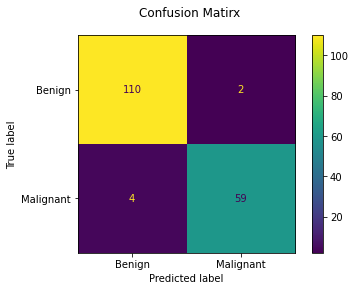

In [53]:
fig=plot_confusion_matrix(clf, X_test, y_test, display_labels=["Benign", "Malignant"])
fig.figure_.suptitle("Confusion Matirx")
plt.show()

In [62]:
print((y_test))

476    2
531    2
40     2
432    2
14     4
      ..
247    4
690    2
673    2
202    2
165    2
Name: Class, Length: 175, dtype: int64


In [64]:
y_test_list = []
for items in y_test:
    y_test_list.append(items)
print(y_test_list)

[2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2]


In [65]:
c = 0
for i in range(0, len(y_pred)):
    if(y_pred[i]==y_test_list[i]):
        c=c+1
accuracy=c/len(y_pred)
print("Accuracy is ")
print(accuracy)

Accuracy is 
0.9657142857142857
